# Basic image processing tutorial

This notebook provides a basic introduction to image processing tutorial with python and [scikit-image](http://scikit-image.org/). We will first briefly introduce Jupyter notebooks and then perform some basic image processing tasks.

## Jupyter notebook

For those who are not familiar with Jupyter notebooks, here is a quick introduction: <br>
Notebooks are documents containing both executable python code and rich text elements (paragraph, equations, figures, links, etc…) commenting and explaining the code. They can be used to edit and run code in a browser while having the results attached and commented in Markdown, allowing you to generate a nicely formatted lab report very easily. <br>
They are composed of cells which type can be set to be either code or Markdown (`Cell/Cell type`). To execute the code in a cell, either go to `Cell/Run Cells` or hit `ctrl-enter`.
In Markdown, you can format text to have headings, bold, italic, mathematics symbols, latex equations, lists, tables, links and more...

Take a look at the following resources:
* Jupyter Notebook [documentation](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html) and [examples](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/examples_index.html)
* [Markdown cheat sheet](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed)

## Introduction to image processing using scikit-image

Scikit-image is a useful package containing a collection of algorithms for image processing. You will be using it quite often throughout the labs.

### 1. Load an image

You can load an image from a file using the [io](https://scikit-image.org/docs/stable/api/skimage.io.html) module.

In [1]:
! pip install scikit-image -q
! pip install matplotlib -q

In [2]:
import os
import skimage.io

astronaut = skimage.io.imread(os.path.join(os.pardir, 'data', 'astronaut.png'))

Or use image already provided in the [data](https://scikit-image.org/docs/stable/api/skimage.data.html) module.

In [3]:
import skimage.data

camera = skimage.data.camera()

### 2. Display images

You can display images with the [matplotlib](https://matplotlib.org/index.html) package. <br>

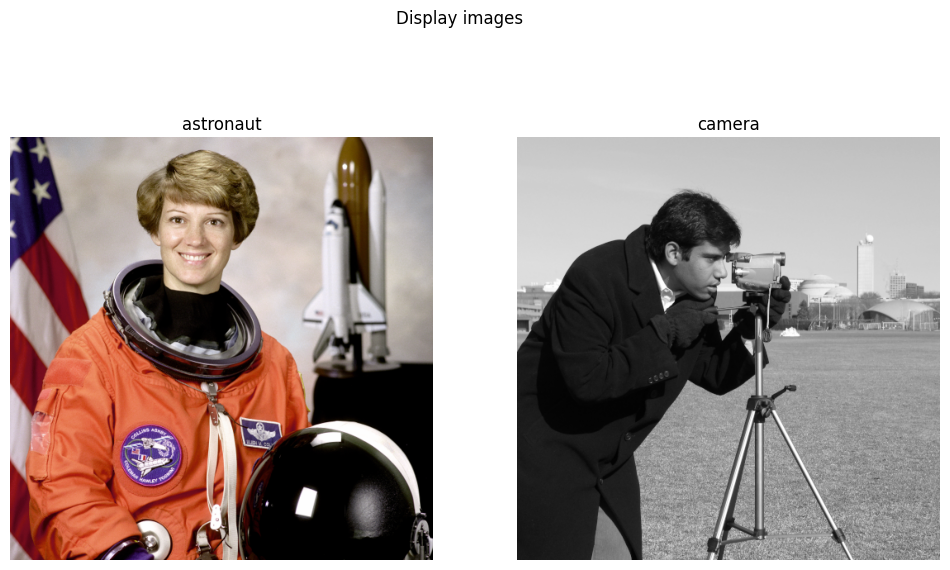

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
# The previous line makes plots static for better integration in notebooks
# You can enable interactive plots inside the notebooks (zoom, ...) by 
# replacing this line with %matplotlib notebook

fig, ax = plt.subplots(1, 2, figsize=(12, 7))

ax[0].imshow(astronaut)
ax[0].set_title('astronaut')
ax[0].axis('off')

ax[1].imshow(camera, cmap='gray')
ax[1].set_title('camera')
ax[1].axis('off')

plt.suptitle('Display images')
plt.show()

### 3. Modify pixel values

Let's look at how the images are represented.

In [5]:
print('astronaut is of type {}, has dimensions {}, and a total number of {} elements'.format(
    type(astronaut), astronaut.shape, astronaut.size))

print('camera is of type {}, has dimensions {}, and a total number of {} elements'.format(
    type(camera), camera.shape, camera.size))

astronaut is of type <class 'numpy.ndarray'>, has dimensions (512, 512, 3), and a total number of 786432 elements
camera is of type <class 'numpy.ndarray'>, has dimensions (512, 512), and a total number of 262144 elements


You can see that astronaut is an RGB image with 3 channels, while camera is a grayscale image with only one.
Both image are stored as Numpy arrays, so accessing and modifying a pixel value is done the same way as Numpy arrays, taking into account the number of channels:

You can convert RGB images to grayscale using the [color](https://scikit-image.org/docs/stable/api/skimage.color.html) package.

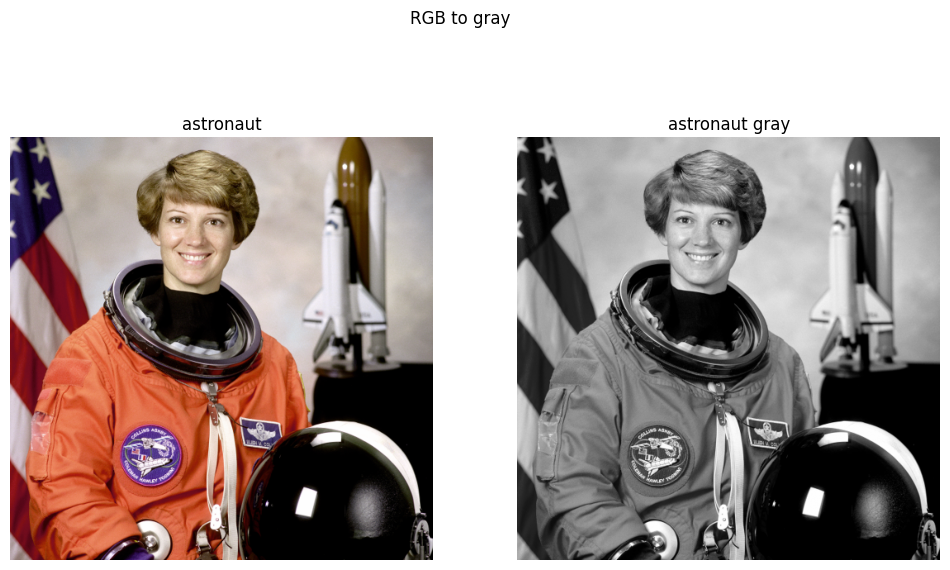

In [6]:
import skimage.color

astronaut_gray = skimage.color.rgb2gray(astronaut)

fig, ax = plt.subplots(1, 2, figsize=(12, 7))

ax[0].imshow(astronaut)
ax[0].set_title('astronaut')
ax[0].axis('off')

ax[1].imshow(astronaut_gray, cmap='gray')
ax[1].set_title('astronaut gray')
ax[1].axis('off')

plt.suptitle('RGB to gray')
plt.show()

In [23]:
# access grayscale value
x, y = 10, 10
print('Grayscale value at location {}x{} is {}'.format(x, y, camera[x, y]))
# modify grayscale value
camera[10,10] = 100
print('The new grayscale value at location {}x{} is {}'.format(x, y, camera[x, y]))

# access RED value (channel 0)
channel = 0
print('Red value at location {}x{} is {}'.format(x, y, astronaut[x, y, channel]))
# modify RED value
astronaut[x, y, channel] = 100
print('The new Red value at location {}x{} is {}'.format(x, y, astronaut[x, y, channel]))

Grayscale value at location 10x10 is 200
The new grayscale value at location 10x10 is 100
Red value at location 10x10 is 100
The new Red value at location 10x10 is 100


You can use numpy indexing to perform different kinds of operations on images.

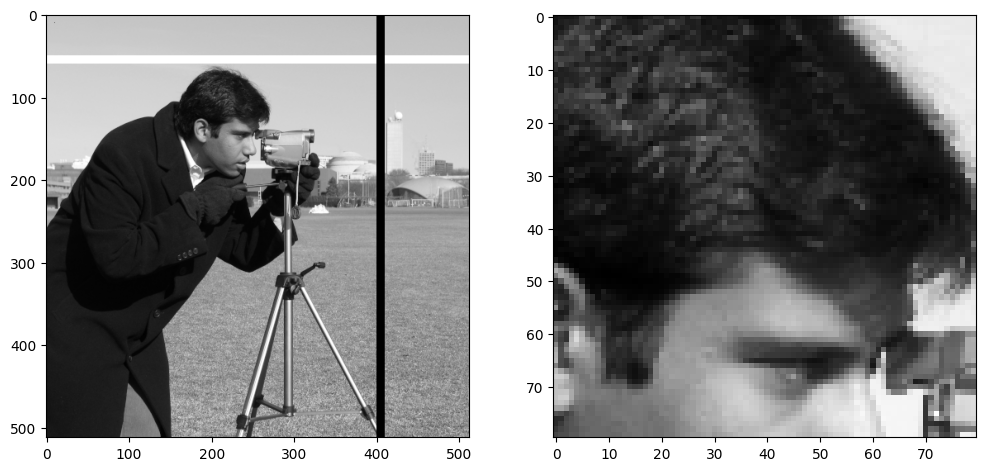

In [8]:
# Slicing
# Set some rows to white and columns to black
camera[50:60] = 255
camera[:, 400:410] = 0

# Extract a patch from the image
camera_face = camera[80:160, 190:270]

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
ax[0].imshow(camera, cmap='gray')
ax[1].imshow(camera_face, cmap='gray')
plt.show()

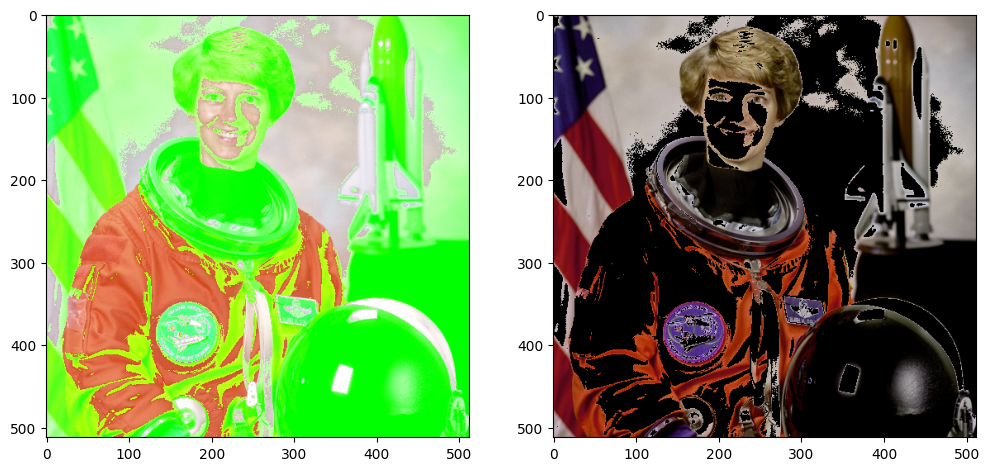

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(512, 512))

In [29]:
import numpy as np

# Masking (boolean)
mask_black = astronaut[:,:,0] > 200 # mask computed on red channel
mask_white = np.logical_not(mask_black)

astronaut_mask_w = np.copy(astronaut)
astronaut_mask_b = np.copy(astronaut)

astronaut_mask_w[mask_white, 0] = 255 # the mask can be applied on a specific channel ...
astronaut_mask_b[mask_black] = 0 # ... or on all channels at once

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
ax[0].imshow(astronaut_mask_w)
ax[1].imshow(astronaut_mask_b)
plt.show()

### 4. Save images

In [10]:
cat = skimage.data.chelsea()

# Save image
skimage.io.imsave('cat.png', cat)

### 5. Scikit-image functions
Skimage contains a lot of useful functions for image processing, here are a few of them.

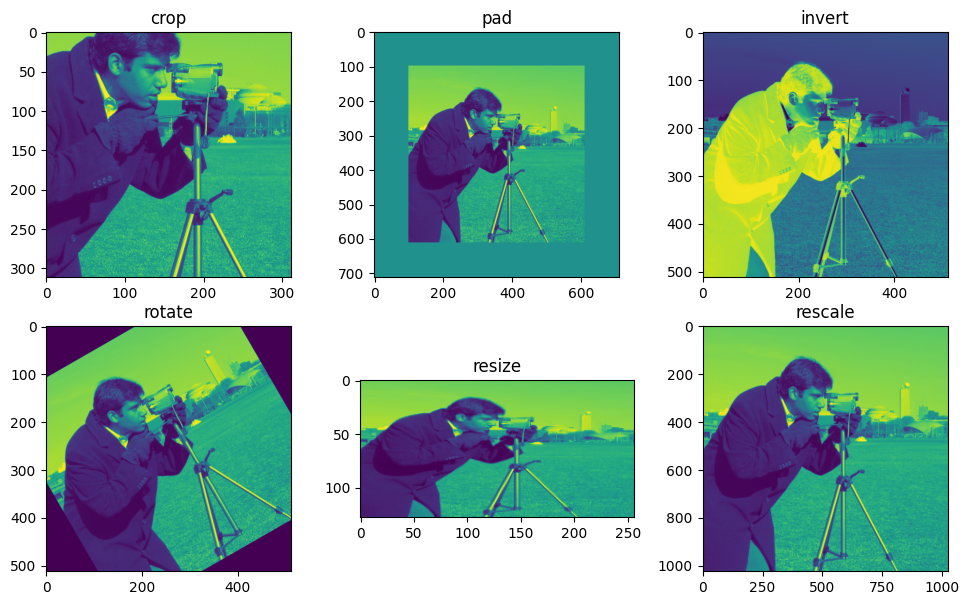

In [11]:
import skimage.util
import skimage.transform

img = skimage.data.camera()

# Cropping
img_crop = skimage.util.crop(img, ((100, 100), (100, 100)))

# Padding
img_pad = skimage.util.montage([img], padding_width=100)

# Inverting
img_invert = skimage.util.invert(img)

# Rotating
img_rot = skimage.transform.rotate(img, 30)

# Resizing
img_resize = skimage.transform.resize(img, (128, 256), mode='reflect')

# Rescaling
img_rescale = skimage.transform.rescale(img, 2, mode='reflect')

# Plot
fig, ax = plt.subplots(2, 3, figsize=(12, 7))

ax[0,0].imshow(img_crop)
ax[0,0].set_title('crop')

ax[0,1].imshow(img_pad)
ax[0,1].set_title('pad')

ax[0,2].imshow(img_invert)
ax[0,2].set_title('invert')

ax[1,0].imshow(img_rot)
ax[1,0].set_title('rotate')

ax[1,1].imshow(img_resize)
ax[1,1].set_title('resize')

ax[1,2].imshow(img_rescale)
ax[1,2].set_title('rescale')

plt.show()

### 6. Filtering
A lot of filters are available in the [filters](https://scikit-image.org/docs/stable/api/skimage.filters.html) module.

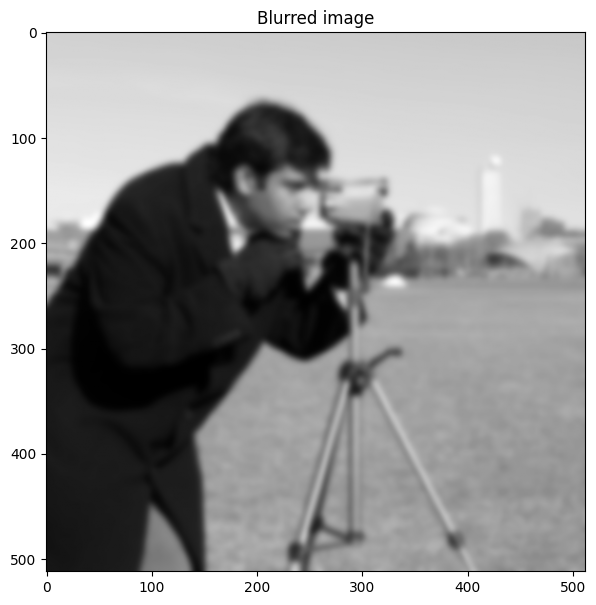

In [12]:
import skimage.filters

camera = skimage.data.camera()
camera_blur = skimage.filters.gaussian(camera, sigma=3)

plt.figure(figsize=(12, 7))
plt.imshow(camera_blur, cmap='gray')
plt.title('Blurred image')
plt.show()

### 7. Histogram
Histograms give you an overall idea of the intensity distribution of an image. It is a plot with pixel values in X-axis and corresponding number of pixels in the image on Y-axis. By looking at the histogram of an image, you get intuition about contrast, brightness, intensity distribution etc of that image.

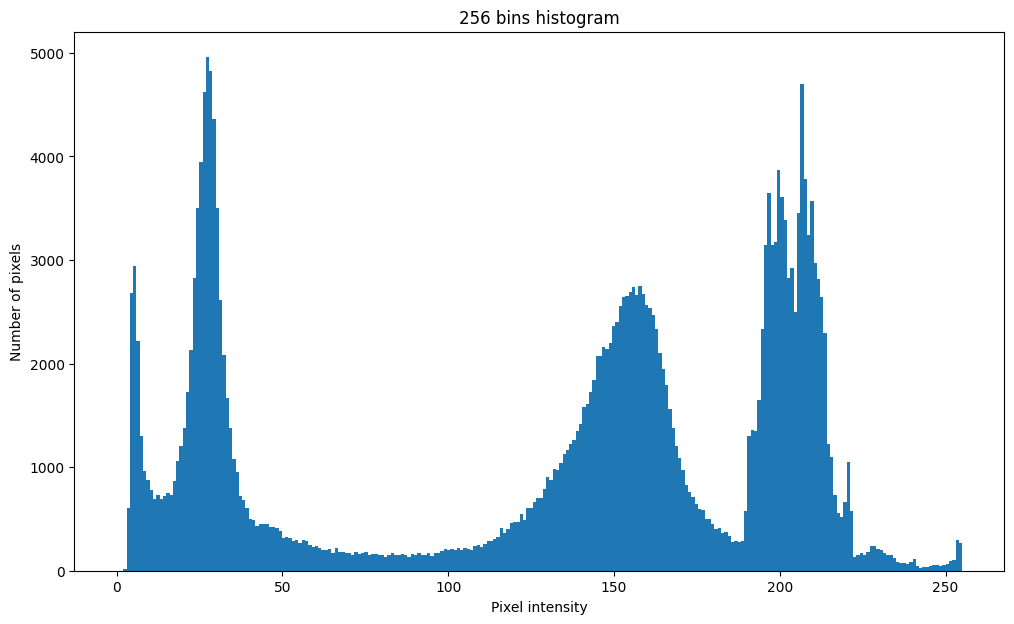

In [13]:
camera = skimage.data.camera()
nb_bins = 256

# Display histogram
plt.figure(figsize=(12, 7))
plt.hist(camera.ravel(), bins=nb_bins)
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.title('256 bins histogram')

plt.show()

### 8. FFT
To compute the Fast Fourier Transform of an image, simply use the [fft](https://numpy.org/doc/stable/reference/routines.fft.html) module from numpy.

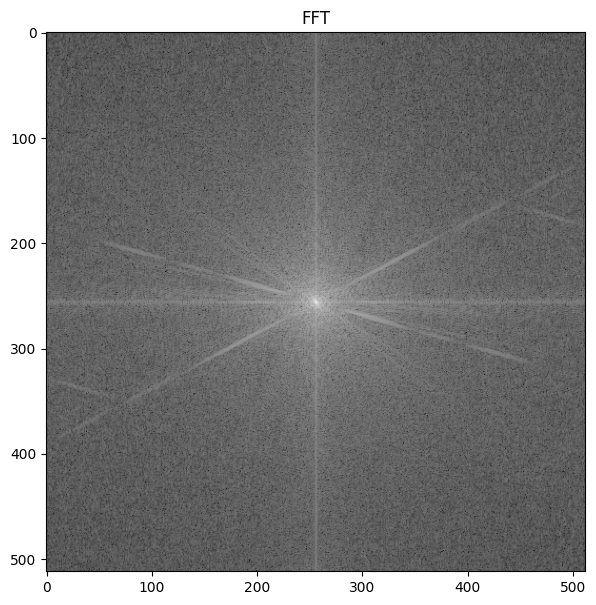

In [14]:
camera = skimage.data.camera()
camera_fft = np.fft.fft2(camera)

plt.figure(figsize=(12, 7))
plt.imshow(np.log(np.abs(np.fft.fftshift(camera_fft))), cmap='gray')
plt.title('FFT')
plt.show()


## Useful resources
This notebook was only a basic introduction on manipulating images with scikit-image and numpy. To go deeper, you should check the following links:
- scikit-image [user guide](https://scikit-image.org/docs/stable/user_guide/index.html) and [examples](http://scikit-image.org/docs/stable/auto_examples/index.html) _(useful for the labs)_
- documentations of [scikit-image](http://scikit-image.org/docs/stable/) and [numpy](https://numpy.org/doc/stable/reference/)

For people who are not familiar with python/numpy/matplotlib:
- [python tutorial](https://docs.python.org/3/tutorial/)
- [numpy tutorial](https://numpy.org/doc/stable/user/quickstart.html)
- [numpy for matlab users](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html)
- [matplotlib tutorial](https://matplotlib.org/tutorials/index.html)
